In [1]:
! pip install opencv-python ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.1/994.1 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 61.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 63.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [15]:
from google.colab.patches import cv2_imshow
import requests
from ultralytics import YOLO
import cv2

In [37]:
import requests

# Here we are using a sample image of a `Falcon 2000`
image_url = "https://github.com/valdemirum/FGCV-aircraft-prediction/raw/main/resources/sample.jpg"
filename = "sample.jpg"

try:
    response = requests.get(image_url, stream=True)
    response.raise_for_status()

    with open(filename, 'wb') as file:
        for chunk in response.iter_content(chunk_size=8192):
            if chunk:
                file.write(chunk)
    print(f"Image downloaded successfully and saved as {filename}")

except requests.exceptions.RequestException as e:
    print(f"An error occurred: {e}")

An error occurred: 404 Client Error: Not Found for url: https://raw.githubusercontent.com/valdemirum/FGCV-aircraft-prediction/refs/heads/main/resources/sample.jpg


In [16]:
model = YOLO("model_weights.pt")

In [17]:
image = cv2.imread("sample.jpg")

In [18]:
results = model.predict(image)


0: 480x640 1 Falcon 2000, 232.3ms
Speed: 13.0ms preprocess, 232.3ms inference, 3.6ms postprocess per image at shape (1, 3, 480, 640)


In [19]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: '707-320', 1: '727-200', 2: '737-200', 3: '737-300', 4: '737-400', 5: '737-500', 6: '737-600', 7: '737-700', 8: '737-800', 9: '737-900', 10: '747-100', 11: '747-200', 12: '747-300', 13: '747-400', 14: '757-200', 15: '757-300', 16: '767-200', 17: '767-300', 18: '767-400', 19: '777-200', 20: '777-300', 21: 'A300B4', 22: 'A310', 23: 'A318', 24: 'A319', 25: 'A320', 26: 'A321', 27: 'A330-200', 28: 'A330-300', 29: 'A340-200', 30: 'A340-300', 31: 'A340-500', 32: 'A340-600', 33: 'A380', 34: 'ATR-42', 35: 'ATR-72', 36: 'An-12', 37: 'BAE 146-200', 38: 'BAE 146-300', 39: 'BAE-125', 40: 'Beechcraft 1900', 41: 'Boeing 717', 42: 'C-130', 43: 'C-47', 44: 'CRJ-200', 45: 'CRJ-700', 46: 'CRJ-900', 47: 'Cessna 172', 48: 'Cessna 208', 49: 'Cessna 525', 50: 'Cessna 560', 51: 'Challenger 600', 52: 'DC-10', 53: 'DC-3', 54: 'DC-6', 55: 'DC-8', 56: 'DC-9-30', 5

In [24]:
for result in results:
    for box in result.boxes:
        class_id = int(box.cls[0])  # <--- This is the predicted class index
        class_name = model.names[class_id] # <--- This is the human readble thing.
        print(class_name)

        x1, y1, x2, y2 = map(int, box.xyxy[0])

        class_id = int(box.cls[0])
        confidence = float(box.conf[0])
        class_name = model.names[class_id]

        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

        label = f"{class_name}: {confidence:.2f}"
        cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

Falcon 2000


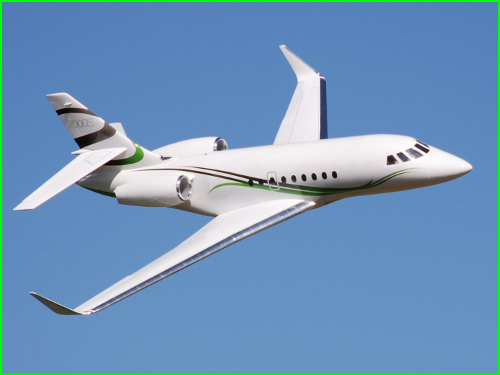

True

In [25]:
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite("output.jpg", image)